We are going to define higher central finite-difference operators.
Recall the Taylor expansion:

$$f(x+dx) = \sum_{n=0}^{\infty} \frac{f^{n}(x)}{n!} dx^n$$

Calculate the finite-difference operatiors

\begin{eqnarray}
\begin{array}{llll}
af(x+dx) & = & a\big[f(x) + f'(x)dx +\frac{1}{2!}f''(x)dx^2 + ... \big]\\
bf(x) & = & b[f(x)]\\
cf(x-dx) & = & c\big[f(x) - f'(x)dx +\frac{1}{2!}f''(x)dx^2 + ... \big]
\end{array}
\end{eqnarray}

For the second ederivative by comparing the coefficients, we obtain:

\begin{eqnarray}
\begin{array}{llll}
a+ & b & +c = & 0\\
a  &  & -c = & 0\\
a  &  & +c = & \frac{2!}{dx^2}\\
\end{array}
\end{eqnarray}

which leads to 
$$
  \begin{pmatrix} 
   1 & 1 & 1 \\
   1 & 0 & -1 \\
   1 & 0 & 1
   \end{pmatrix} 
  \begin{pmatrix} 
   a\\
   b\\
   c   
   \end{pmatrix}    
=
   \begin{pmatrix} 
   \frac{1}{2dx^2}\\
   \frac{-2}{2dx^2}\\
   \frac{1}{2dx^2}\\
  \end{pmatrix} 
$$


The weights of the finite-difference operators are:
$$
   \begin{pmatrix} 
   a\\
   b\\
   c\\
   \end{pmatrix} 
      =
   \begin{pmatrix} 
   \frac{1}{2dx^2}\\
   \frac{-2}{dx^2}\\
   \frac{1}{2dx^2}\\
   \end{pmatrix} 
$$







# Calculating the Taylor operator

The subroutine central_difference_coeffients() initializes the system matrix and solves for the different weights assuming $dx=1$. It calculates the centered differences using an arbitrary number of coefficients, also for higher derivatives. The weights are defined at $x \pm idx$ and $i=0,...,(nop-1)/2$, where $nop$ is the lenght of the operator. $\textbf{Note:}$ $\textit{nop}$ has to be an odd number (3,5,...). 

It returns a central finite difference stencil (a vector of length $\textit{nop}$) for the n-th derivative. 

In [3]:
# Import libraries 
import math 
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Define function to calculate Taylor operator 
def central_difference_coeffients(nop, n):
    """
    Calculate the central finite difference stencil for an arbitrary number 
    of points and an arbitrary order derivate.
    
    :param nop: The number of points for the stencil. Must be
        an odd number
    :param n: The derivate order. Must be a positive number.
    """
    
    m = np.zeros((nop,nop))
    for i in range(nop):
        for j in range(nop):
            dx = j - nop // 2
            m[i, j] = dx ** i
    
    s = np.zeros(nop)
    s[n] = math.factorial(n)

    # The following statement return oper = inv(m) s
    oper = np.linalg.solve(m, s)
    # Calculate operator
    return oper
    


In [171]:
# Calculate and plot the Taylor operator
# Give the length of the operator, recall that it must be an odd value.
nop = 25
# Define the order of the derivative 
# Give order of derivative (0 - interpolation, 1 - first derivative, 2 - second derivative)
n = 5
#Get operator from the routine "central_difference_coeffients(nop, n)"
#oper = central_difference_coeffients(nop, n)


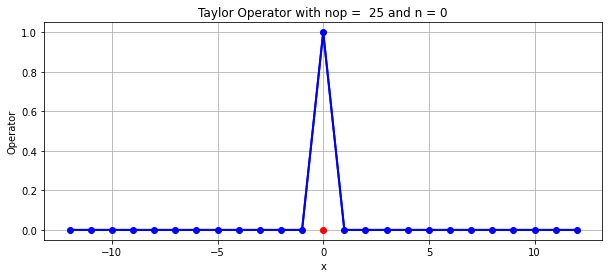

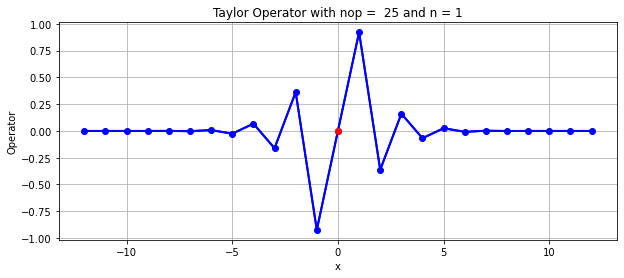

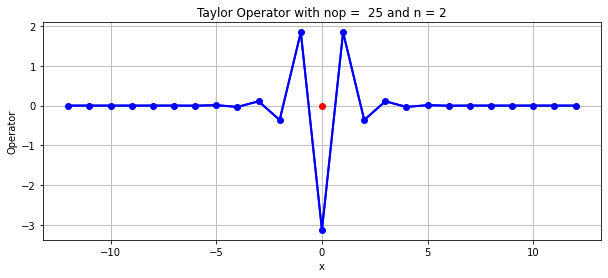

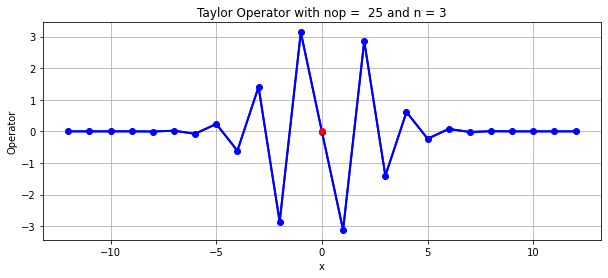

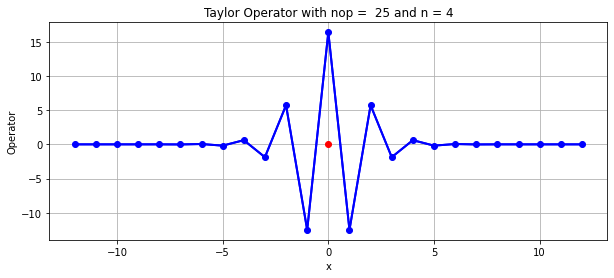

In [172]:
# Plot the operator
for value in range(0,n):
    oper = central_difference_coeffients(nop, value)
    x = np.linspace(-(nop - 1)/2, (nop - 1)/2, nop)
    # Sinple plot with operator 
    plt.figure(figsize=(10,4))
    plt.plot(x, oper, lw=2, color='blue')
    plt.plot(x, oper, lw=2, marker = 'o', color='blue')
    #plt.plot(x,nder5-ader, label = 'Difference', lw=2, ls=':')
    plt.plot(0, 0,lw=2,marker='o',color='red')
    plt.title("Taylor Operator with nop =  %i and n = %i" % (nop, value))
    plt.xlabel('x')
    plt.ylabel('Operator')
    plt.grid()
    plt.show()

## Conclusions
- The Taylor operator weights decrease rapidly with distance from the central point
- In practice often 4th order operators are used to calculate space derivatives
